In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from keras import layers
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout, GlobalAveragePooling2D
from keras.models import Sequential,  Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import resnet50, MobileNet,VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet50
from tensorflow.keras.applications.mobilenet import preprocess_input as preprocess_inputMN
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_inputVG


In [45]:

from time import time
from datetime import datetime


import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
print('TensorFlow version:', tf.__version__)

import zipfile
from shutil import copyfile


import numpy as np
import pandas as pd
import random as python_random

import glob
import shutil
from random import seed
from random import random
import os
import os.path


from IPython.display import Javascript

TensorFlow version: 2.17.0


In [46]:
# not sampling properly
# import os
# import shutil
# import random

# # Function for Random Sampling
# def random_sampling(indices, src_dir, dst_dir):
#     """
#     Randomly samples files from the source directory and copies them to the destination directory.

#     Parameters:
#     indices (list): List of indices to select files randomly.
#     src_dir (str): Path to the source directory containing the original dataset.
#     dst_dir (str): Path to the destination directory to store sampled files.
#     """
#     # Ensure the source directory exists
#     if not os.path.exists(src_dir):
#         raise FileNotFoundError(f"Source directory does not exist: {src_dir}")

#     # Create the destination directory if it does not exist
#     if not os.path.exists(dst_dir):
#         os.makedirs(dst_dir)

#     # List all subdirectories or files in the source directory
#     rice_classes = os.listdir(src_dir)

#     for rice_type in rice_classes:
#         # Path to the subfolder for a specific rice type
#         rice_src_path = os.path.join(src_dir, rice_type)

#         # Skip if it's not a directory
#         if not os.path.isdir(rice_src_path):
#             continue

#         # List all files in the subfolder
#         rice_files = os.listdir(rice_src_path)

#         # Filter out non-file items (e.g., directories) and get full file paths
#         rice_files = [f for f in rice_files if os.path.isfile(os.path.join(rice_src_path, f))]

#         # Check if there are enough files to sample
#         if len(rice_files) == 0:
#             print(f"No files found in {rice_src_path}. Skipping...")
#             continue

#         # Sample files based on the indices
#         sampled_files = [rice_files[i % len(rice_files)] for i in indices]

#         # Path to the destination subfolder for the rice type
#         rice_dst_path = os.path.join(dst_dir, rice_type)

#         # Create the destination subfolder if it does not exist
#         if not os.path.exists(rice_dst_path):
#             os.makedirs(rice_dst_path)

#         # Copy sampled files to the destination subfolder
#         for file_name in sampled_files:
#             src_file_path = os.path.join(rice_src_path, file_name)
#             dst_file_path = os.path.join(rice_dst_path, file_name)

#             # Copy the file
#             shutil.copy(src_file_path, dst_file_path)

#     print(f"Successfully sampled files to {dst_dir}.")

# # Draw sample from the original dataset
# from random import randint

# # Generate indices for Random Sampling
# index = [randint(0, 15000) for _ in range(2000)]

# # Define source and destination directories
# src_dir = r'C:\Users\hp\Desktop\IITK\PAPERS\CODES\archive (2)\Rice_Image_Dataset'
# dst_dir = r'C:\Users\hp\Desktop\IITK\PAPERS\CODES\dst_dir\samples'

# # Ensure reproducibility
# random.seed(123)

# # Perform random sampling
# random_sampling(index, src_dir=src_dir, dst_dir=dst_dir)

In [47]:
import os
import shutil
import random

# Function for Random Sampling
def random_sampling(indices, src_dir, dst_dir):
    """
    Randomly samples files from the source directory and copies them to the destination directory.

    Parameters:
    indices (list): List of indices to select files randomly.
    src_dir (str): Path to the source directory containing the original dataset.
    dst_dir (str): Path to the destination directory to store sampled files.
    """
    # Ensure the source directory exists
    if not os.path.exists(src_dir):
        raise FileNotFoundError(f"Source directory does not exist: {src_dir}")

    # Create the destination directory if it does not exist
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)

    # List all subdirectories or files in the source directory
    rice_classes = os.listdir(src_dir)

    for rice_type in rice_classes:
        # Path to the subfolder for a specific rice type
        rice_src_path = os.path.join(src_dir, rice_type)

        # Skip if it's not a directory
        if not os.path.isdir(rice_src_path):
            continue

        # List all files in the subfolder
        rice_files = os.listdir(rice_src_path)

        # Filter out non-file items (e.g., directories) and get full file paths
        rice_files = [f for f in rice_files if os.path.isfile(os.path.join(rice_src_path, f))]

        # Check if there are enough files to sample
        if len(rice_files) == 0:
            print(f"No files found in {rice_src_path}. Skipping...")
            continue

        # Sample files based on the indices
        sampled_files = [rice_files[i % len(rice_files)] for i in indices]

        # Path to the destination subfolder for the rice type
        rice_dst_path = os.path.join(dst_dir, rice_type)

        # Create the destination subfolder if it does not exist
        if not os.path.exists(rice_dst_path):
            os.makedirs(rice_dst_path)

        # Copy sampled files to the destination subfolder
        for file_name in sampled_files:
            src_file_path = os.path.join(rice_src_path, file_name)
            dst_file_path = os.path.join(rice_dst_path, file_name)

            # Copy the file
            shutil.copy(src_file_path, dst_file_path)

    print(f"Successfully sampled files to {dst_dir}.")

# Function to check the number of files in a folder
def count_files_in_folder(folder_path):
    """
    Counts the number of files in a given folder and its subfolders.

    Parameters:
    folder_path (str): Path to the folder to count files in.

    Returns:
    int: Total number of files in the folder.
    """
    if not os.path.exists(folder_path):
        raise FileNotFoundError(f"Folder does not exist: {folder_path}")

    total_files = 0
    for root, dirs, files in os.walk(folder_path):
        total_files += len(files)

    return total_files

# Draw sample from the original dataset
from random import randint

# Generate indices for Random Sampling
index = [randint(0, 15000) for _ in range(2000)]

# Define source and destination directories
src_dir = r'C:\Users\hp\Desktop\IITK\PAPERS\CODES\archive (2)\Rice_Image_Dataset'
dst_dir = r'C:\Users\hp\Desktop\IITK\PAPERS\CODES\dst_dir\samples'

# Ensure reproducibility
random.seed(123)

# Perform random sampling
random_sampling(index, src_dir=src_dir, dst_dir=dst_dir)

# Check the number of files in the destination directory
file_count = count_files_in_folder(dst_dir)
print(f"Total number of files in the destination folder: {file_count}")


Successfully sampled files to C:\Users\hp\Desktop\IITK\PAPERS\CODES\dst_dir\samples.
Total number of files in the destination folder: 9115


In [48]:
# Draw sample from the original dataset 
from random import randint

# Index for Random Sampling
index = []
for _ in range(2000):
	value = randint(0, 15000)
	index.append(value)

# Define source dir and destination dir
src_dir = 'C:\\Users\\hp\\Desktop\\IITK\\PAPERS\\CODES\\archive (2)\\Rice_Image_Dataset'
dst_dir = 'C:\\Users\\hp\\Desktop\\IITK\\PAPERS\\CODES\\dst_dir\\samples'

import random
random.seed(123)
random_sampling(index, src_dir=src_dir, dst_dir=dst_dir)

Successfully sampled files to C:\Users\hp\Desktop\IITK\PAPERS\CODES\dst_dir\samples.


In [49]:
file_count = count_files_in_folder(dst_dir)
print(f"Total number of files in the destination folder: {file_count}")

Total number of files in the destination folder: 9115


In [72]:
base_path = r'C:\Users\hp\Desktop\IITK\PAPERS\CODES\dst_dir\samples'


In [73]:
rice_classes = os.listdir(base_path)
print(rice_classes)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [74]:
image = cv2.imread(r'C:\Users\hp\Desktop\IITK\PAPERS\CODES\dst_dir\samples\Arborio\Arborio (16).jpg')

print(type(image))

print('-------')

print('Width:', image.shape[0])
print('Height:', image.shape[1])
print('Channels:', image.shape[2])


<class 'numpy.ndarray'>
-------
Width: 250
Height: 250
Channels: 3


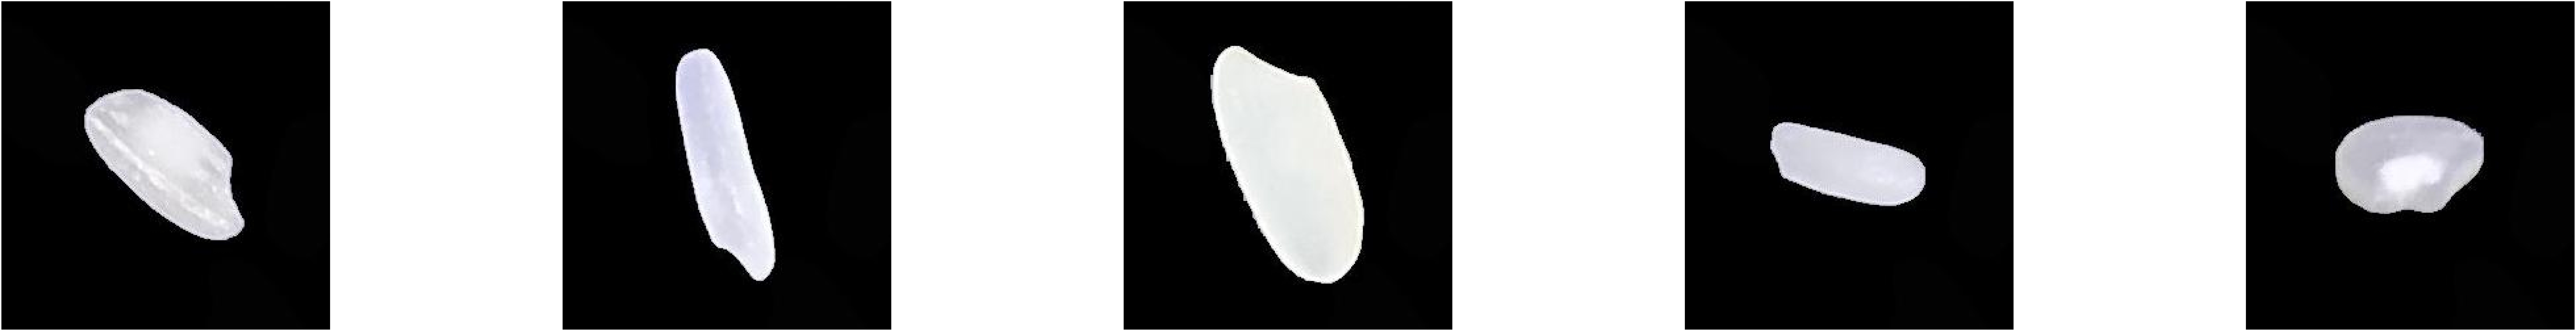

In [75]:
plt.figure(0, figsize=(250,250))
cpt = 0

# Iterate over directories in the base path
for riso in os.listdir(base_path):
    riso_path = os.path.join(base_path, riso)  # Full path to subdirectory
    if os.path.isdir(riso_path):  # Ensure it's a directory
        for i in range(1, 2):  # Example: selecting the second file (index 1)
            cpt += 1
            sp = plt.subplot(7, 5, cpt)
            sp.axis('Off')

            # List files in the subdirectory
            files = os.listdir(riso_path)
            if i < len(files):  # Ensure index is valid
                img_path = os.path.join(riso_path, files[i])  # Full path to the image
                img = load_img(img_path, target_size=(250, 250))
                plt.imshow(img, cmap="gray")

plt.show()

In [131]:
import os
import pandas as pd
import random
import shutil

# Define the base path and desired number of images per class
base_path = r'C:\Users\hp\Desktop\IITK\PAPERS\CODES\dst_dir\samples'
desired_image_count = 1860
output_path = r'C:\Users\hp\Desktop\IITK\PAPERS\CODES\dst_dir\balanced_samples'

# Create output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

# Initialize a DataFrame to track the distribution
df_distribution_train = pd.DataFrame()

# Iterate over directories in the base path
for riso in os.listdir(base_path):
    dir_path = os.path.join(base_path, riso)  # Path to the current class folder
    if os.path.isdir(dir_path):  # Ensure it's a directory
        images = os.listdir(dir_path)  # List all files (images) in the directory
        image_count = len(images)  # Count the images
        
        # Ensure output directory for this class exists
        class_output_path = os.path.join(output_path, riso)
        os.makedirs(class_output_path, exist_ok=True)

        if image_count < desired_image_count:
            # Duplicate images to reach the desired count
            images_to_add = random.choices(images, k=desired_image_count - image_count)
            images += images_to_add
        elif image_count > desired_image_count:
            # Randomly sample images to reduce to the desired count
            images = random.sample(images, desired_image_count)
        
        # Copy selected images to the output directory
        for img in images:
            source = os.path.join(dir_path, img)
            destination = os.path.join(class_output_path, img)
            shutil.copy(source, destination)

        # Update the DataFrame with the balanced count
        df_distribution_train = pd.concat([df_distribution_train, pd.DataFrame({'Expression': [riso], 'n_images': [len(images)]})], ignore_index=True)

# Print the final distribution
print(df_distribution_train)


  Expression  n_images
0    Arborio      1860
1    Basmati      1860
2     Ipsala      1860
3    Jasmine      1860
4  Karacadag      1860


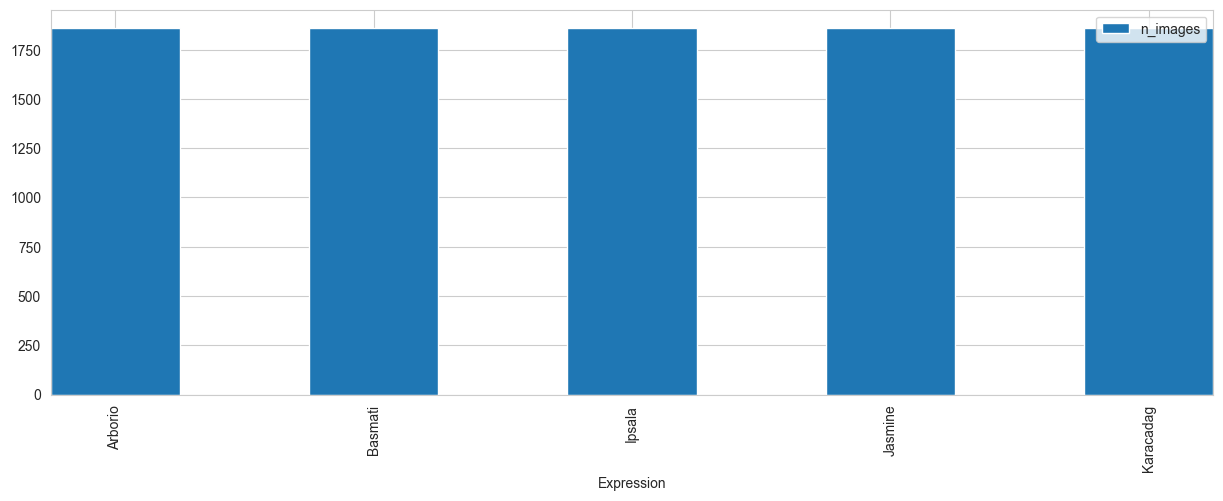

In [132]:
ax = df_distribution_train.plot.bar(x='Expression',y='n_images',figsize=(15, 5))
ax.autoscale(axis='x',tight=True);

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [81]:
# Training dataset: standardization + data augmentation

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   rotation_range = 20,
                                   validation_split=0.2)

In [82]:
# Validation dataset: standardization

validation_datagen = ImageDataGenerator(rescale=1/255,
                                        validation_split=0.2)

In [83]:
# Training data loader

train_generator = train_datagen.flow_from_directory(base_path,
                                                    target_size=(224,224),
                                                    color_mode='rgb',
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    subset='training',
                                                    shuffle=True,
                                                    seed=1) 

Found 7292 images belonging to 5 classes.


In [84]:
# Validation data loader

validation_generator = validation_datagen.flow_from_directory(base_path,
                                                              target_size=(224,224),
                                                              color_mode='rgb',
                                                              batch_size=32,
                                                              class_mode='categorical',
                                                              subset='validation',
                                                              shuffle=False,
                                                              seed=1) 

Found 1823 images belonging to 5 classes.


In [85]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32, 5)


In [86]:
size=224
channels=3
batch_size = 64
num_classes = 5

# Training set

train_processing = ImageDataGenerator(preprocessing_function=preprocess_input_resnet50,
                                      validation_split=0.2,
                                      rotation_range = 25,
                                      width_shift_range = .2,
                                      height_shift_range = .2,
                                      horizontal_flip = True,
                                      zoom_range = .2)

In [87]:

# Validation set

validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_resnet50,
                                        validation_split=0.2)

In [88]:
# Training data loader 

train_generator_tf = train_processing.flow_from_directory (base_path,   
                                                     target_size=(size, size), 
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     class_mode='categorical',
                                                     subset='training',
                                                     color_mode="rgb",
                                                     interpolation='nearest')

Found 7292 images belonging to 5 classes.


In [89]:
# Validation data loader

validation_generator_tf = validation_datagen.flow_from_directory(base_path,  
                                                              target_size=(size,size),
                                                              subset='validation',
                                                              color_mode="rgb",
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              shuffle=False,
                                                              interpolation='nearest')

Found 1823 images belonging to 5 classes.


In [90]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32, 5)


In [91]:
num_classes = 5

In [92]:
# Architecture definition

inputs = keras.Input((224, 224, 3))

x = inputs
x = keras.layers.Conv2D(32, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(), kernel_initializer= tf.keras.initializers.HeUniform(seed=123) )(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(64, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(), kernel_initializer= tf.keras.initializers.HeUniform(seed=123) )(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)
x = keras.layers.MaxPooling2D(3, strides = 3, padding = 'same')(x)

x = keras.layers.Conv2D(128, 3, padding = 'same', kernel_regularizer = tf.keras.regularizers.l2(), kernel_initializer= tf.keras.initializers.HeUniform(seed=123) )(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation('relu')(x)

x = keras.layers.GlobalMaxPooling2D()(x)

outputs = keras.layers.Dense(num_classes, activation = 'softmax', kernel_regularizer=tf.keras.regularizers.l2())(x)
net1 = keras.Model(inputs, outputs)

In [93]:
# Architecture summary

net1.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 25, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,789 (370.27 KB)

 Trainable params: 94,341 (368.52 KB)

 Non-trainable params: 448 (1.75 KB)

In [97]:
# Architecture plot

keras.utils.plot_model(net1)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [95]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [98]:
# Network Compilation

net1.compile(loss = keras.losses.categorical_crossentropy,
             optimizer = keras.optimizers.RMSprop(learning_rate=0.001),
             metrics =['accuracy'])

In [99]:
# Reduce Learning Rate

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', 
                                                 mode='min',
                                                 patience=3, 
                                                 verbose=1, 
                                                 factor=0.5, 
                                                 min_lr=0.000001)

In [100]:
# Training

history1 = net1.fit(train_generator,
                    epochs = 30,
                    validation_data = validation_generator,
                    callbacks = [reduce_lr]);

Epoch 1/30


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


228/228 ━━━━━━━━━━━━━━━━━━━━ 583s 2s/step - accuracy: 0.5312 - loss: 5.8499 - val_accuracy: 0.5798 - val_loss: 3.1949 - learning_rate: 0.0010
Epoch 2/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 470s 2s/step - accuracy: 0.8980 - loss: 2.0890 - val_accuracy: 0.9133 - val_loss: 1.5161 - learning_rate: 0.0010
Epoch 3/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 453s 2s/step - accuracy: 0.9382 - loss: 1.2438 - val_accuracy: 0.7619 - val_loss: 1.3477 - learning_rate: 0.0010
Epoch 4/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 428s 2s/step - accuracy: 0.9413 - loss: 0.9174 - val_accuracy: 0.7570 - val_loss: 1.1728 - learning_rate: 0.0010
Epoch 5/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 391s 2s/step - accuracy: 0.9345 - loss: 0.7590 - val_accuracy: 0.9303 - val_loss: 0.6622 - learning_rate: 0.0010
Epoch 6/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.9350 - loss: 0.6587 - val_accuracy: 0.7532 - val_loss: 1.1925 - learning_rate: 0.0010
Epoch 7/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 389s 2s/step - accuracy: 0.9568 - loss: 0.5457 - val_

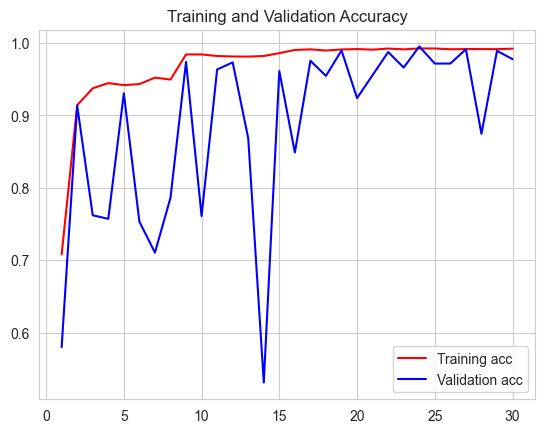

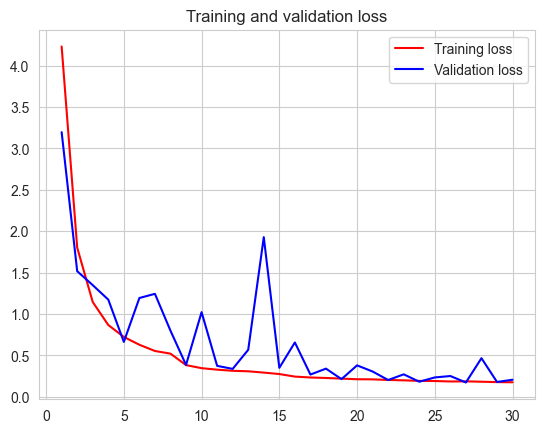

In [101]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)

sns.set_style("whitegrid")
plt.title('Training and Validation Accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [102]:
Y_pred = net1.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
report1 = classification_report(validation_generator.classes, y_pred, target_names=rice_classes, output_dict=True)
df1 = pd.DataFrame(report1).transpose()
df1

57/57 ━━━━━━━━━━━━━━━━━━━━ 19s 320ms/step


,precision,recall,f1-score,support
Arborio,0.923077,1.000000,0.960000,372.00000
Basmati,1.000000,0.973118,0.986376,372.00000
Ipsala,1.000000,1.000000,1.000000,372.00000
Jasmine,0.973753,0.997312,0.985392,372.00000
Karacadag,1.000000,0.910448,0.953125,335.00000
accuracy,0.977510,0.977510,0.977510,0.97751
macro avg,0.979366,0.976176,0.976979,1823.00000
weighted avg,0.978947,0.977510,0.977463,1823.00000


In [124]:
# Saving

net1.save('C:\\Users\\hp\\Desktop\\IITK\\PAPERS\\CODES\\net1.h5')

In [125]:
pretrained_model = resnet50.ResNet50(
    weights='imagenet', 
    include_top=False,  
    input_shape=(size, size, 3), 
    pooling='avg',  
)

In [126]:
layer_dict = dict([(layer.name, layer) for layer in pretrained_model.layers])

for layer in pretrained_model.layers:
    layer.trainable = False

In [127]:
x2 = pretrained_model.output
x2 = Dense(2048,'relu')(x2)
x2 = Dense(512,'relu')(x2)
x2 = Dropout(.15)(x2)
x2 = Dense(128,'relu')(x2)
x2 = Dense(64,'relu')(x2)
x2 = Dropout(.15)(x2)
x2 = Dense(32,'relu')(x2)
x2 = Dense(16,'relu')(x2)
pred2 = Dense(5,'softmax')(x2)

model2 =  Model(inputs=pretrained_model.input, outputs=pred2)

In [128]:
model2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 28,909,765 (110.28 MB)

 Trainable params: 5,322,053 (20.30 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [129]:
model2.compile(
  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [130]:
EarlyStopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=3,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [136]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the EarlyStopping callback with desired parameters
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model2.fit(
    x=train_generator_tf,  # Use the generator as input
    epochs=25,
    validation_data=validation_generator_tf,
    callbacks=[early_stopping]  # Pass the instance here
)


Epoch 1/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 599s 5s/step - accuracy: 0.9563 - loss: 0.1457 - val_accuracy: 0.9813 - val_loss: 0.0680
Epoch 2/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 3360s 30s/step - accuracy: 0.9667 - loss: 0.1059 - val_accuracy: 0.9759 - val_loss: 0.0756
Epoch 3/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 950s 8s/step - accuracy: 0.9705 - loss: 0.0920 - val_accuracy: 0.9709 - val_loss: 0.0761
Epoch 4/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 524s 5s/step - accuracy: 0.9676 - loss: 0.0967 - val_accuracy: 0.9638 - val_loss: 0.1155
Epoch 5/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 541s 5s/step - accuracy: 0.9739 - loss: 0.0821 - val_accuracy: 0.9808 - val_loss: 0.0554
Epoch 6/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 516s 4s/step - accuracy: 0.9754 - loss: 0.0792 - val_accuracy: 0.9726 - val_loss: 0.0891
Epoch 7/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 546s 5s/step - accuracy: 0.9758 - loss: 0.0711 - val_accuracy: 0.9830 - val_loss: 0.0568
Epoch 8/25
114/114 ━━━━━━━━━━━━━━━━━━━━ 517s 5s/step - accuracy: 0.9813 - loss: 0.0623 - val_ac

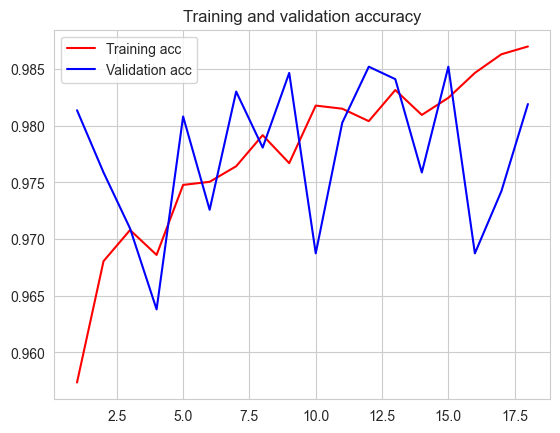

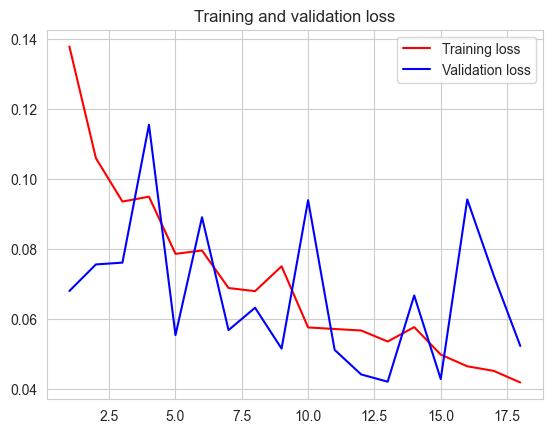

In [143]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

sns.set_style("whitegrid")
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [144]:
model2.save('model2.h5')

In [145]:
Y_pred = model2.predict(validation_generator_tf)
y_pred = np.argmax(Y_pred, axis=1)
report1 = classification_report(validation_generator_tf.classes, y_pred, target_names=rice_classes, output_dict=True)
df1 = pd.DataFrame(report1).transpose()
df1

29/29 ━━━━━━━━━━━━━━━━━━━━ 101s 3s/step


,precision,recall,f1-score,support
Arborio,0.973545,0.989247,0.981333,372.000000
Basmati,0.978780,0.991935,0.985314,372.000000
Ipsala,0.986737,1.000000,0.993324,372.000000
Jasmine,0.991667,0.959677,0.975410,372.000000
Karacadag,0.990937,0.979104,0.984985,335.000000
accuracy,0.984092,0.984092,0.984092,0.984092
macro avg,0.984333,0.983993,0.984073,1823.000000
weighted avg,0.984199,0.984092,0.984055,1823.000000


In [146]:
# Draw sample from the original dataset 
from random import randint

# Index for Random Sampling
index = []
for _ in range(100):
	value = randint(0, 15000)
	index.append(value)

#Define source dir and destination dir
src_dir = 'C:\\Users\\hp\\Desktop\\IITK\\PAPERS\\CODES\\archive (2)\\Rice_Image_Dataset'
dst_dir = 'C:\\Users\\hp\\Desktop\\IITK\\PAPERS\\CODES\\dst_dir\\samples\\Test'

import random
random.seed(123)
random_sampling(index, src_dir=src_dir, dst_dir=dst_dir)

Successfully sampled files to C:\Users\hp\Desktop\IITK\PAPERS\CODES\dst_dir\samples\Test.


In [147]:
test_path = 'C:\\Users\\hp\\Desktop\\IITK\\PAPERS\\CODES\\dst_dir\\samples\\Test'

In [150]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [151]:
# Validation dataset: standardization

test_datagen1 = ImageDataGenerator(rescale=1/255,
                                  validation_split=0.2)

In [152]:
# Training data loader

test_generator1 = test_datagen1.flow_from_directory(test_path,
                                                    target_size=(224,224),
                                                    color_mode='rgb',
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    shuffle=False,
                                                    seed=1)                                                                    


Found 996 images belonging to 5 classes.


In [153]:
rice_classes = os.listdir(test_path)
print(rice_classes)

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


In [154]:
Y_pred_testBfS = net1.predict(test_generator1)
y_pred_testBfS = np.argmax(Y_pred_testBfS, axis=1)
report_testBfS  = classification_report(test_generator1.classes, y_pred_testBfS, target_names=rice_classes, output_dict=True)
df1_testBfS = pd.DataFrame(report_testBfS).transpose()
df1_testBfS

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 439ms/step


,precision,recall,f1-score,support
Arborio,0.921659,1.000000,0.959233,200.000000
Basmati,1.000000,0.950000,0.974359,200.000000
Ipsala,1.000000,1.000000,1.000000,200.000000
Jasmine,0.951691,0.985000,0.968059,200.000000
Karacadag,1.000000,0.928571,0.962963,196.000000
accuracy,0.972892,0.972892,0.972892,0.972892
macro avg,0.974670,0.972714,0.972923,996.000000
weighted avg,0.974568,0.972892,0.972963,996.000000


In [155]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_resnet50)

In [156]:
size=224
channels=3
batch_size = 64
num_classes = 5

In [157]:
test_generator_tf = test_datagen.flow_from_directory(test_path,  
                                                     target_size=(size,size),
                                                     color_mode="rgb",
                                                     batch_size=batch_size,
                                                     class_mode='categorical',
                                                     shuffle=False,
                                                     interpolation='nearest')

Found 996 images belonging to 5 classes.


In [158]:
from tensorflow import keras
model2 = keras.models.load_model('model2.h5')

In [159]:
Y_pred = model2.predict(test_generator_tf)
y_pred = np.argmax(Y_pred, axis=1)
report2 = classification_report(test_generator_tf.classes, y_pred, target_names=rice_classes, output_dict=True)
df2 = pd.DataFrame(report2).transpose()
df2

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 63s 4s/step


,precision,recall,f1-score,support
Arborio,0.985222,1.000000,0.992556,200.000000
Basmati,0.985149,0.995000,0.990050,200.000000
Ipsala,1.000000,1.000000,1.000000,200.000000
Jasmine,0.994924,0.980000,0.987406,200.000000
Karacadag,1.000000,0.989796,0.994872,196.000000
accuracy,0.992972,0.992972,0.992972,0.992972
macro avg,0.993059,0.992959,0.992977,996.000000
weighted avg,0.993031,0.992972,0.992969,996.000000
